Exploring a candidate data set
==============================

*Fraida Fund*

Introduction
------------

In this notebook, we will consider several machine learning tasks
(satirical headline classification, chest X-ray classification, and
candidate data sets for them. We will explore the following questions:

-   Do these data sets seem appropriate for the task?
-   Are there any important limitations of the datasets, or problems
    that need addressing before we use them to train a machine learning
    model?

In fact, each of these datasets has a significant problem that - if not
detected early on - would be a “Garbage In, Garbage Out” situation. See
if you can identify the problem with each dataset!

To get you started, I included some code to show you how to read in the
data. You can add additional code and text cells to explore the data. If
you find something interesting, share it on Piazza!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Taxi tip prediction
-------------------

### Scenario

You are developing an app for NYC taxi drivers that will predict what
the typical tip would be for a given fare. You consider using data
collected by the NYC Taxi and Limousine Commission on taxi trips. The
links are for 2019 data, but previous years are also available. [Data
link for yellow (Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp)
and [data link for green (non-Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Green-Taxi-Trip-Data/q5mz-t52e)

### Read in data

We’ll start by reading in the 2019 Green Taxi trip data. It’s a large
file and takes a long time to download, so we may interrupt the download
in middle (using the Runtime menu in Colab) and just work with the
partial data.

In the next couple of cells, `wget` and `wc` are not Python code -
they’re Linux commands. We can run some basic Linux commands inside our
Colab runtime, and it’s often helpful to do so. For example, we may use
Linux commands to install extra software libraries that are not
pre-installed in our runtime, clone a source code repository from
Github, or download data from the Internet.

In [0]:
!wget "https://data.cityofnewyork.us/api/views/q5mz-t52e/rows.csv?accessType=DOWNLOAD" -O 2019-Green-Taxi-Trip-Data.csv

--2020-06-12 16:17:45--  https://data.cityofnewyork.us/api/views/q5mz-t52e/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘2019-Green-Taxi-Trip-Data.csv’

-Green-Taxi-Trip-Da     [        <=>         ] 311.63M  2.11MB/s               ^C


Is the cell above taking a long time to run? That’s because this data
set is very large, and the server from which it is retrieved is not very
fast. Since we don’t need to explore the whole dataset, necessarily, we
can interrupt the partial download by clicking on the square icon to the
left of the cell that is running.

Then, we can read in just 10,000 rows of data.

In [0]:
df_taxi = pd.read_csv('2019-Green-Taxi-Trip-Data.csv', nrows=10000)   
df_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,12/21/2018 03:17:29 PM,12/21/2018 03:18:57 PM,N,1,264,264,5,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1,NaN
1,2,01/01/2019 12:10:16 AM,01/01/2019 12:16:32 AM,N,1,97,49,2,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1,NaN
2,2,01/01/2019 12:27:11 AM,01/01/2019 12:31:38 AM,N,1,49,189,2,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1,1,NaN
3,2,01/01/2019 12:46:20 AM,01/01/2019 01:04:54 AM,N,1,189,17,2,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1,1,NaN
4,2,01/01/2019 12:19:06 AM,01/01/2019 12:39:43 AM,N,1,82,258,1,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2,1,NaN


In [0]:
# Basic Info
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               10000 non-null  int64  
 1   lpep_pickup_datetime   10000 non-null  object 
 2   lpep_dropoff_datetime  10000 non-null  object 
 3   store_and_fwd_flag     10000 non-null  object 
 4   RatecodeID             10000 non-null  int64  
 5   PULocationID           10000 non-null  int64  
 6   DOLocationID           10000 non-null  int64  
 7   passenger_count        10000 non-null  int64  
 8   trip_distance          10000 non-null  float64
 9   fare_amount            10000 non-null  float64
 10  extra                  10000 non-null  float64
 11  mta_tax                10000 non-null  float64
 12  tip_amount             10000 non-null  float64
 13  tolls_amount           10000 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  imp

In [0]:
#Convert Dates
df_taxi['lpep_pickup_datetime'] = pd.to_datetime(df_taxi['lpep_pickup_datetime'])
df_taxi['lpep_dropoff_datetime'] = pd.to_datetime(df_taxi['lpep_dropoff_datetime'])
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10000 non-null  int64         
 1   lpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   store_and_fwd_flag     10000 non-null  object        
 4   RatecodeID             10000 non-null  int64         
 5   PULocationID           10000 non-null  int64         
 6   DOLocationID           10000 non-null  int64         
 7   passenger_count        10000 non-null  int64         
 8   trip_distance          10000 non-null  float64       
 9   fare_amount            10000 non-null  float64       
 10  extra                  10000 non-null  float64       
 11  mta_tax                10000 non-null  float64       
 12  tip_amount             10000 non-null  float64       
 13  to

In [0]:
df_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1,264,264,5,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1,NaN
1,2,2019-01-01 00:10:16,2019-01-01 00:16:32,N,1,97,49,2,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1,NaN
2,2,2019-01-01 00:27:11,2019-01-01 00:31:38,N,1,49,189,2,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1,1,NaN
3,2,2019-01-01 00:46:20,2019-01-01 01:04:54,N,1,189,17,2,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1,1,NaN
4,2,2019-01-01 00:19:06,2019-01-01 00:39:43,N,1,82,258,1,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2,1,NaN


In [0]:
#Drop ehail_fee and congestion_surcharge as they don't have any values
# Took this Idea from Kunwar's notebook - Kudos to him
df_taxi = df_taxi.drop(columns=['ehail_fee', 'congestion_surcharge'], axis=1) # axis=1 => column wise
df_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
9442,2,2010-09-23 00:01:14,2010-09-23 14:48:48,N,1,193,7,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
0,2,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1,264,264,5,0.00,3.0,0.5,0.5,0.0,0.0,0.3,4.3,2,1
310,2,2018-12-31 09:39:52,2018-12-31 09:46:30,N,1,129,82,1,0.98,6.0,0.5,0.5,0.0,0.0,0.3,7.3,2,1
4663,2,2018-12-31 15:07:03,2018-12-31 15:12:48,N,1,42,41,1,0.86,6.0,0.5,0.5,0.0,0.0,0.3,7.3,1,1
3777,2,2018-12-31 15:08:10,2018-12-31 15:16:02,N,1,74,168,1,1.27,7.5,0.5,0.5,0.0,0.0,0.3,8.8,2,1


In [0]:
#Adding duration of the trip as a column
df_taxi['trip_duration'] = df_taxi['lpep_dropoff_datetime'] - df_taxi['lpep_pickup_datetime']
df_taxi['trip_duration'] = df_taxi['trip_duration'].dt.seconds/60 # Duration in minutes - I din't find direct dt.minutes not working for some reason
df_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
9442,2,2010-09-23 00:01:14,2010-09-23 14:48:48,N,1,193,7,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,887.566667
0,2,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1,264,264,5,0.00,3.0,0.5,0.5,0.0,0.0,0.3,4.3,2,1,1.466667
310,2,2018-12-31 09:39:52,2018-12-31 09:46:30,N,1,129,82,1,0.98,6.0,0.5,0.5,0.0,0.0,0.3,7.3,2,1,6.633333
4663,2,2018-12-31 15:07:03,2018-12-31 15:12:48,N,1,42,41,1,0.86,6.0,0.5,0.5,0.0,0.0,0.3,7.3,1,1,5.750000
3777,2,2018-12-31 15:08:10,2018-12-31 15:16:02,N,1,74,168,1,1.27,7.5,0.5,0.5,0.0,0.0,0.3,8.8,2,1,7.866667


In [0]:
df_taxi = df_taxi.sort_values(by='lpep_pickup_datetime')
df_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
9442,2,2010-09-23 00:01:14,2010-09-23 14:48:48,N,1,193,7,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,887.566667
0,2,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1,264,264,5,0.00,3.0,0.5,0.5,0.0,0.0,0.3,4.3,2,1,1.466667
310,2,2018-12-31 09:39:52,2018-12-31 09:46:30,N,1,129,82,1,0.98,6.0,0.5,0.5,0.0,0.0,0.3,7.3,2,1,6.633333
4663,2,2018-12-31 15:07:03,2018-12-31 15:12:48,N,1,42,41,1,0.86,6.0,0.5,0.5,0.0,0.0,0.3,7.3,1,1,5.750000
3777,2,2018-12-31 15:08:10,2018-12-31 15:16:02,N,1,74,168,1,1.27,7.5,0.5,0.5,0.0,0.0,0.3,8.8,2,1,7.866667


In [0]:
df_taxi.isnull().sum() # Looks Fine

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
trip_duration            0
dtype: int64

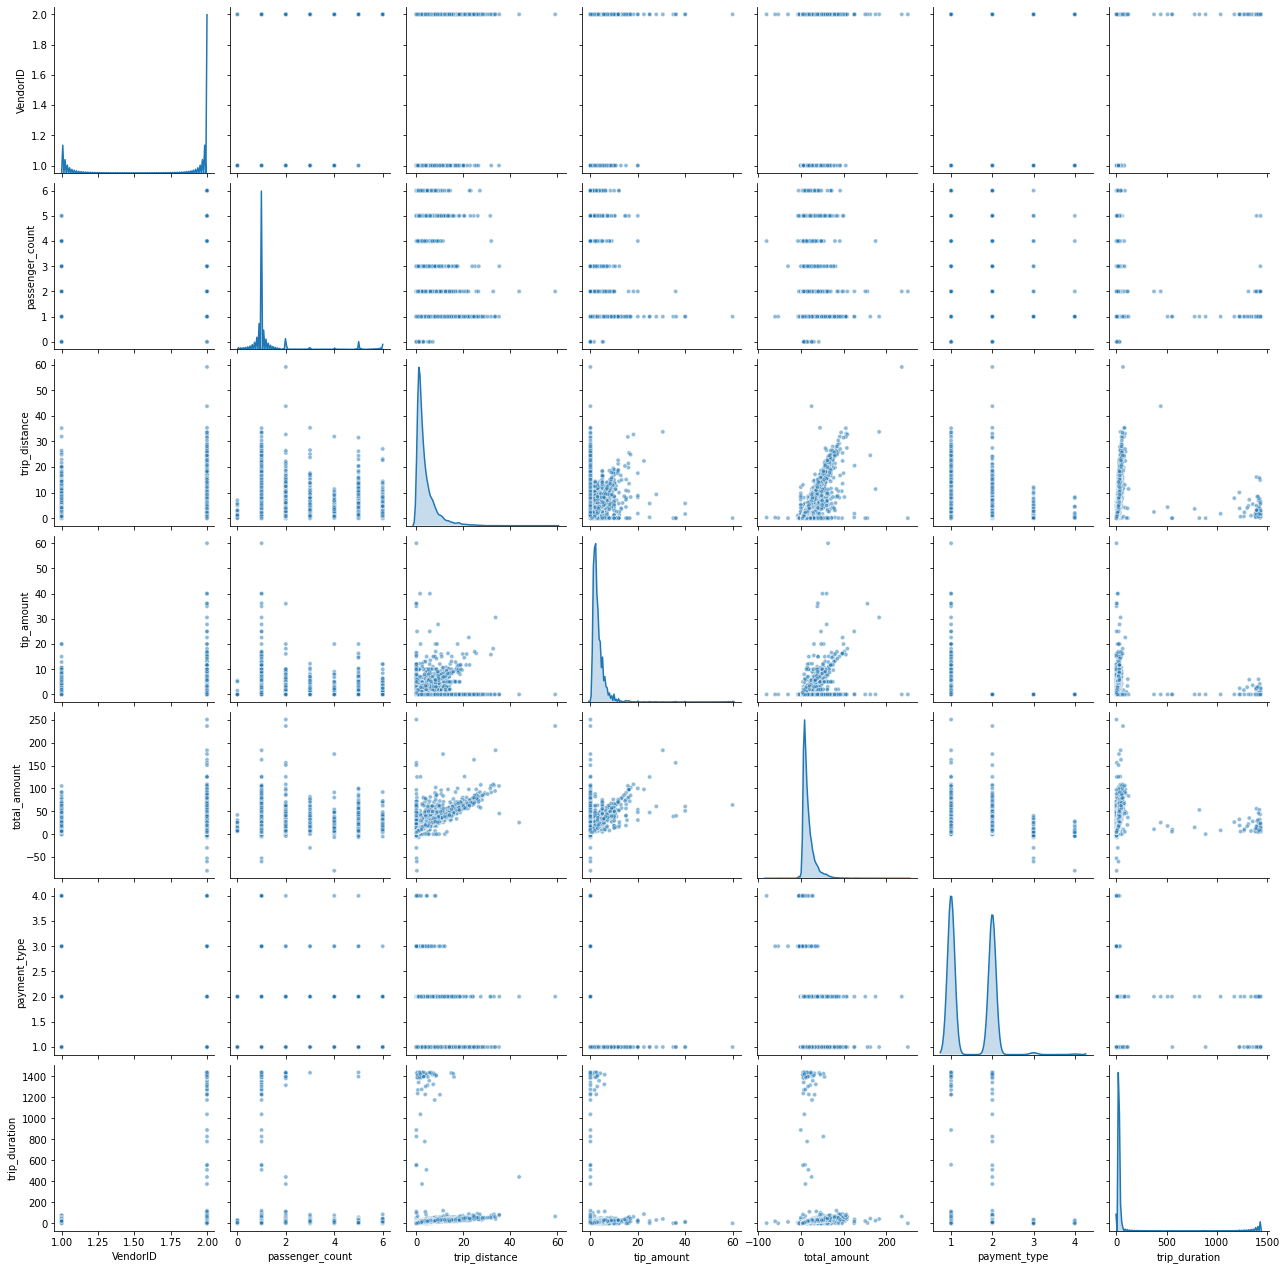

In [0]:
sns.pairplot(df_taxi, 
             vars=['VendorID', 'passenger_count', 'trip_distance', 'tip_amount', 'total_amount','payment_type','trip_duration'],
             diag_kind = 'kde',
             plot_kws={'alpha':0.5, 'size': 0.1})

In [0]:
'''
Total amount semms to have negative values
Tip information available for only Payment type 1 (Credit Card). And payment type 5 (Unknown) and 6 (Voided Tip) are not present at all.
(I think not having 5 and 6 is fine although I might be wrong.)
There is an odd relation between trip duration and total_amount, but it might seem possible though
Insight (Thanks to Dr. Fraida Fund) all tips payed by cash are zero, (They migh or mightnot tip) - Faulty data recording => Our ML model will be garbage
'''

In [0]:
df_taxi.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.850700,1.270300,115.45010,129.816700,1.398200,3.824410,14.875782,0.273700,0.478350,1.152888,0.228926,0.278640,17.340916,1.482500,1.064000,22.512762
std,0.356402,1.000669,77.29294,77.854705,1.085797,4.205115,13.092188,0.251186,0.108892,2.337766,1.199691,0.080575,14.312285,0.522227,0.244765,109.618295
min,1.000000,1.000000,3.00000,2.000000,0.000000,0.000000,-80.000000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-80.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,49.00000,62.000000,1.000000,1.180000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.000000,1.000000,6.366667
50%,2.000000,1.000000,92.00000,129.000000,1.000000,2.380000,10.500000,0.500000,0.500000,0.000000,0.000000,0.300000,12.800000,1.000000,1.000000,11.233333
75%,2.000000,1.000000,179.00000,196.000000,1.000000,4.900000,18.500000,0.500000,0.500000,1.860000,0.000000,0.300000,21.300000,2.000000,1.000000,18.433333
max,2.000000,6.000000,265.00000,265.000000,6.000000,59.130000,250.500000,1.000000,0.500000,60.000000,25.000000,0.300000,250.500000,4.000000,2.000000,1438.100000


In [0]:
df_taxi['tip_amount'].describe()

count    10000.000000
mean         1.152888
std          2.337766
min          0.000000
25%          0.000000
50%          0.000000
75%          1.860000
max         60.000000
Name: tip_amount, dtype: float64

In [0]:
df_taxi.groupby('payment_type')['tip_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
1,5272.0,2.186813,2.84708,0.0,0.0,1.75,3.06,60.0
2,4649.0,0.000000,0.00000,0.0,0.0,0.00,0.00,0.0
3,61.0,0.000000,0.00000,0.0,0.0,0.00,0.00,0.0
4,18.0,0.000000,0.00000,0.0,0.0,0.00,0.00,0.0


In [0]:
df_taxi.groupby('trip_type')['tip_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
trip_type,,,,,,,,
1,9360.0,1.139326,2.227198,0.0,0.0,0.0,1.95,60.0
2,640.0,1.351234,3.581080,0.0,0.0,0.0,0.00,36.0


In [0]:
# Forgot to check if there is a money imbalance, lol
# As usual it's the Kunwar's notebook that reminded me
charges_breakdown = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
(df_taxi[charges_breakdown].sum(axis=1) == df_taxi['total_amount']).sum()

8964

In [0]:
# So the rest 10000 - 8964 = 1036 seem to have some problems (We will examine below), having a closer look as suggested by Dr. Fraida Fund, their payment types are 3 and 4 only! 
df_negative_amount = df_taxi[df_taxi['total_amount']<0]

In [0]:
df_negative_amount

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
553,2,2019-01-01 00:18:26,2019-01-01 00:21:18,N,1,145,145,1,0.27,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3,1,2.866667
531,2,2019-01-01 00:29:11,2019-01-01 00:31:20,N,1,179,179,1,0.44,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,3,1,2.150000
356,2,2019-01-01 00:38:17,2019-01-01 00:38:28,N,1,95,95,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1,0.183333
1076,2,2019-01-01 00:46:12,2019-01-01 00:47:40,N,1,17,37,1,0.20,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,3,1,1.466667
847,2,2019-01-01 00:56:29,2019-01-01 00:57:04,N,1,83,260,2,0.17,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1,0.583333
460,2,2019-01-01 01:00:45,2019-01-01 01:04:02,N,1,40,54,6,0.63,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3,1,3.283333
1989,2,2019-01-01 01:02:21,2019-01-01 01:05:58,N,1,226,226,1,0.03,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3,1,3.616667
1285,2,2019-01-01 01:17:22,2019-01-01 01:18:30,N,6,134,134,1,0.00,-5.5,0.0,-0.5,0.0,0.0,-0.3,-6.3,3,1,1.133333
3298,2,2019-01-01 02:06:02,2019-01-01 02:06:09,N,1,42,42,2,0.03,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,4,1,0.116667
3281,2,2019-01-01 02:24:04,2019-01-01 02:26:35,N,1,7,7,1,0.52,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3,1,2.516667


In [0]:
print(len(df_negative_amount))
#Assumed to find 1036 rows with negative amounts, but only found 33, why is it so? , Lets examine more closer

33


In [0]:
df_positive_amount = df_taxi[df_taxi['total_amount']>0]
print(len(df_positive_amount))
# So, 9938 + 33 = 9971, where are the rest, hmm

9938


In [0]:
df_excat_amount = df_taxi[df_taxi['total_amount']==0]
print(len(df_excat_amount))
# Now, 9971 + 29 = 10000, Yay!!

29


In [0]:
#Didn't know about percentage tiping senario, thanks to Dr. Fraida Fund, we will dive into it now
df_taxi['tip_percentage'] = (df_taxi['tip_amount'] / df_taxi['fare_amount'])*100.0
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9442 to 8371
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10000 non-null  int64         
 1   lpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   store_and_fwd_flag     10000 non-null  object        
 4   RatecodeID             10000 non-null  int64         
 5   PULocationID           10000 non-null  int64         
 6   DOLocationID           10000 non-null  int64         
 7   passenger_count        10000 non-null  int64         
 8   trip_distance          10000 non-null  float64       
 9   fare_amount            10000 non-null  float64       
 10  extra                  10000 non-null  float64       
 11  mta_tax                10000 non-null  float64       
 12  tip_amount             10000 non-null  float64       
 13 

In [0]:
#Stats
df_taxi.groupby('tip_percentage')['tip_amount'].describe() # Holymoly, few people seem too generous

,count,mean,std,min,25%,50%,75%,max
tip_percentage,,,,,,,,
0.000000,6415.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
0.016667,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.019231,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.025641,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.028169,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...
1400.000000,1.0,35.00,NaN,35.00,35.00,35.00,35.00,35.00
1448.000000,1.0,36.20,NaN,36.20,36.20,36.20,36.20,36.20
2400.000000,1.0,60.00,NaN,60.00,60.00,60.00,60.00,60.00


In [0]:
#Let's be realistic and remove tips about 100%
df_taxi.drop(df_taxi[df_taxi['tip_percentage'] > 100].index, inplace = True)
df_taxi.groupby('tip_percentage')['tip_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
tip_percentage,,,,,,,,
0.000000,6415.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
0.016667,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.019231,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.025641,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
0.028169,1.0,0.01,NaN,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...
76.923077,1.0,5.00,NaN,5.00,5.00,5.00,5.00,5.00
80.000000,1.0,4.00,NaN,4.00,4.00,4.00,4.00,4.00
83.333333,1.0,5.00,NaN,5.00,5.00,5.00,5.00,5.00


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

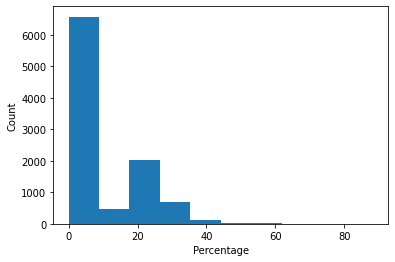

In [0]:
#Now, let's plot with tip_percentage - hist and cdf as suggested by Dr. Fraida Fund
plt.hist(df_taxi['tip_percentage'])
plt.xlabel('Percentage')
plt.ylabel('Count')

In [0]:
# Zero tipping which was wrongly reported shows its colors here - So Grabage in, Garbage out

Highway traffic prediction
--------------------------

### Scenario

You are working for the state of New York to develop a traffic
prediction model for the NYS Thruway. The following Thruway data is
available: Number and types of vehicles that entered from each entry
point on the Thruway, along with their exit points, at 15 minute
intervals. The link points to the most recent week’s worth of available
data, but this data is available through 2014. [Link to NYS Thruway
data](https://data.ny.gov/Transportation/NYS-Thruway-Origin-and-Destination-Points-for-All-/4dbf-24u2)

### Read in data

In [0]:
url = 'https://data.ny.gov/api/views/4dbf-24u2/rows.csv?accessType=DOWNLOAD&sorting=true'
df_thruway = pd.read_csv(url)

In [0]:
df_thruway.info() # No null values - Great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634221 entries, 0 to 634220
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Date                            634221 non-null  object
 1   Entrance                        634221 non-null  object
 2   Exit                            634221 non-null  object
 3   Interval Beginning Time         634221 non-null  int64 
 4   Vehicle Class                   634221 non-null  object
 5   Vehicle Count                   634221 non-null  int64 
 6   Payment Type (Cash or E-ZPass)  634221 non-null  object
dtypes: int64(2), object(5)
memory usage: 33.9+ MB


In [0]:
df_thruway.head()

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass)
0,06/09/2020,15,17,0,5H,1,CASH
1,06/09/2020,15,17,0,5S,1,E-ZPass
2,06/09/2020,15,17,0,5H,6,E-ZPass
3,06/09/2020,15,17,0,2L,16,E-ZPass
4,06/09/2020,15,17,0,2H,1,E-ZPass


In [0]:
# Seems clean, let's see the stats
df_thruway.describe()

,Interval Beginning Time,Vehicle Count
count,634221.000000,634221.000000
mean,1291.148425,3.208837
std,551.931624,7.622574
min,0.000000,1.000000
25%,900.000000,1.000000
50%,1315.000000,1.000000
75%,1715.000000,2.000000
max,2345.000000,279.000000


In [0]:
# Let's check the 15min intervals
diff = df_thruway['Interval Beginning Time'].max() - df_thruway['Interval Beginning Time'].min()
diff 

2345

In [0]:
# Number of 15mins in one week vs the result
one_week = 7*24*60/15
print(one_week)

672.0


In [0]:
#There is something off, let check deeper
df_thruway['Date'] = pd.to_datetime(df_thruway['Date'])
df_thruway.head()

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass)
0,2020-06-09,15,17,0,5H,1,CASH
1,2020-06-09,15,17,0,5S,1,E-ZPass
2,2020-06-09,15,17,0,5H,6,E-ZPass
3,2020-06-09,15,17,0,2L,16,E-ZPass
4,2020-06-09,15,17,0,2H,1,E-ZPass


In [0]:
# Realised that its not a single reading for 15min, it depends on the class of the vehicle, so for instance see the readings for which 'Interval Beginning Time' is 15min
df_thruway[df_thruway['Interval Beginning Time']==15] # see we have 2866 rows 

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass)
6,2020-06-09,15,17,15,2L,11,E-ZPass
7,2020-06-09,15,17,15,2H,3,E-ZPass
8,2020-06-09,15,17,15,2L,4,CASH
9,2020-06-09,15,17,15,6H,1,E-ZPass
10,2020-06-09,15,17,15,5S,1,E-ZPass
...,...,...,...,...,...,...,...
632490,2020-06-04,B3,B1,15,5H,11,E-ZPass
632491,2020-06-04,B3,B1,15,6H,2,E-ZPass
633121,2020-06-03,B3,B1,15,5H,9,E-ZPass
633122,2020-06-03,B3,B1,15,2L,7,E-ZPass


In [0]:
print(df_thruway['Interval Beginning Time'].unique())
print(len(df_thruway['Interval Beginning Time'].unique()))
# so, 96*15 = 1440 min * 7 = 10080 , which is same as 7*24*60 - Yay!!

[   0   15   30   45  100  115  130  145  200  215  230  245  300  315
  330  345  400  415  430  445  500  515  530  545  600  615  630  645
  700  715  730  745  800  815  830  845  900  915  930  945 1000 1015
 1030 1045 1100 1115 1130 1145 1200 1215 1230 1245 1300 1315 1330 1345
 1400 1415 1430 1445 1500 1515 1530 1545 1600 1615 1630 1645 1700 1715
 1730 1745 1800 1815 1830 1845 1900 1915 1930 1945 2000 2015 2030 2045
 2100 2115 2130 2145 2200 2215 2230 2245 2300 2315 2330 2345]
96


In [0]:
#Now check for each day,
df_thruway.groupby('Date')['Interval Beginning Time'].nunique() # Seems Okay

Date
2020-06-03    96
2020-06-04    96
2020-06-05    96
2020-06-06    96
2020-06-07    96
2020-06-08    96
2020-06-09    96
Name: Interval Beginning Time, dtype: int64

In [0]:
# But as suggested by Dr. Fraida Fund, we might not have all combinations
# We need  (9 (No. of classes) * 96 * 7 * 24 * 60 /15 ) * 2 (payment types)= 1161216 rows
df_thruway.shape # We dont have all of those, so missing values can't be ignored but to be recoreded as zero, this creates a problem

(634221, 8)

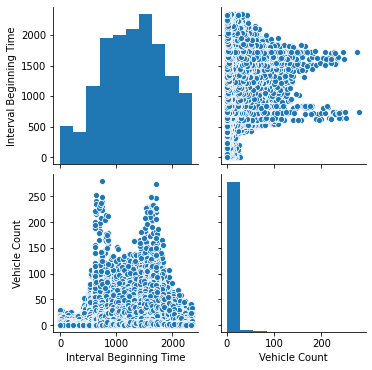

In [0]:
#We will see stats latter, lets plot and see if we can find something fishy
sns.pairplot(df_thruway)

In [0]:
# Hmm, expected to get more plots, but its expected as those 2 are only numeric, but the look fine - I may be wrong, see the latter plots
# Then lets go back to stats
df_thruway.groupby('Payment Type (Cash or E-ZPass)').describe() # We find out there are more vehicles that use E-ZPass

Interval Beginning Time               ... Vehicle Count       
                                                 count         mean  ...           75%    max
Payment Type (Cash or E-ZPass)                                       ...                     
CASH                                          148754.0  1355.144635  ...           2.0   75.0
E-ZPass                                       485467.0  1271.539075  ...           3.0  279.0

[2 rows x 16 columns]

In [0]:
#We forgot to check if heavy vehicles are more on saturday or sun, lets do that now
df_thruway['day_name'] = df_thruway['Date'].dt.day_name()
df_thruway.head()

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),day_name
0,2020-06-09,15,17,0,5H,1,CASH,Tuesday
1,2020-06-09,15,17,0,5S,1,E-ZPass,Tuesday
2,2020-06-09,15,17,0,5H,6,E-ZPass,Tuesday
3,2020-06-09,15,17,0,2L,16,E-ZPass,Tuesday
4,2020-06-09,15,17,0,2H,1,E-ZPass,Tuesday


In [0]:
df_thruway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634221 entries, 0 to 634220
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            634221 non-null  datetime64[ns]
 1   Entrance                        634221 non-null  object        
 2   Exit                            634221 non-null  object        
 3   Interval Beginning Time         634221 non-null  int64         
 4   Vehicle Class                   634221 non-null  object        
 5   Vehicle Count                   634221 non-null  int64         
 6   Payment Type (Cash or E-ZPass)  634221 non-null  object        
 7   day_name                        634221 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 38.7+ MB


In [0]:
# Now let's do it!
df_thruway.groupby('day_name').describe()

Interval Beginning Time                           ... Vehicle Count            
                            count         mean         std  ...           50%  75%    max
day_name                                                    ...                          
Friday                   103760.0  1285.519420  549.576741  ...           1.0  2.0  239.0
Monday                    97646.0  1278.940868  542.490600  ...           1.0  2.0  248.0
Saturday                  77893.0  1304.228044  562.733352  ...           1.0  3.0  116.0
Sunday                    73472.0  1387.467130  545.851132  ...           1.0  3.0  116.0
Thursday                 100729.0  1276.863267  549.853716  ...           1.0  2.0  236.0
Tuesday                   99499.0  1271.243329  552.070496  ...           1.0  2.0  279.0
Wednesday                 81222.0  1255.443968  553.841282  ...           1.0  3.0  274.0

[7 rows x 16 columns]

In [0]:
df_thruway.groupby('Vehicle Class')['day_name'].describe() # Heavys are more on thur and fri

,count,unique,top,freq
Vehicle Class,,,,
2H,45725,7,Thursday,8249
2L,391390,7,Friday,62696
3H,18513,7,Thursday,3549
3L,9412,7,Sunday,1704
4H,18344,7,Friday,3337
4L,10137,7,Friday,1744
5H,83540,7,Thursday,14648
5S,37771,7,Thursday,6837
6H,7376,7,Wednesday,1463


In [0]:
df_thruway.groupby('day_name')['Vehicle Class'].describe() # As expected

,count,unique,top,freq
day_name,,,,
Friday,103760,12,2L,62696
Monday,97646,12,2L,57589
Saturday,77893,12,2L,58183
Sunday,73472,12,2L,57209
Thursday,100729,12,2L,57706
Tuesday,99499,12,2L,56866
Wednesday,81222,12,2L,41141


In [0]:
df_thruway.groupby('Entrance').describe()

Interval Beginning Time                           ... Vehicle Count            
                           count         mean         std  ...           50%  75%    max
Entrance                                                   ...                          
15                       24038.0  1257.939928  611.686349  ...           1.0  3.0  122.0
16                        4358.0  1330.912116  526.399508  ...           1.0  2.0   28.0
17                       19023.0  1244.966619  590.276562  ...           1.0  3.0  120.0
18                        9131.0  1302.711642  542.547812  ...           1.0  3.0   83.0
19                       12347.0  1294.076294  551.616815  ...           1.0  4.0   77.0
20                        8909.0  1307.047929  533.632654  ...           1.0  3.0   52.0
21                       10776.0  1323.419636  529.623816  ...           1.0  3.0   39.0
21B                       8981.0  1263.800245  552.716545  ...           1.0  2.0   41.0
22                        6988.0  1261.491843  511.557399  ...           1.0  2.0   23.0
23                       18359.0  1266.354104  566.405018  ...           1.0  3.0   98.0
24                       34084.0  1284.931346  572.376155  ...           1.0  3.0  275.0
25                       12944.0  1271.168109  546.170876  ...           1.0  3.0  279.0
25A                      15205.0  1241.100954  574.641577  ...           1.0  3.0  115.0
26                        9403.0  1293.889716  518.280728  ...           1.0  2.0   34.0
27                       13282.0  1323.261933  522.072002  ...           1.0  2.0   67.0
28                       10576.0  1274.901191  547.196528  ...           1.0  1.0   14.0
29                        5560.0  1270.509892  505.824339  ...           1.0  1.0   14.0
29A                       3561.0  1285.155855  499.548149  ...           1.0  1.0    7.0
30                        7659.0  1297.878966  504.161530  ...           1.0  1.0   12.0
31                       16438.0  1321.703370  519.667822  ...           1.0  2.0   22.0
32                        8183.0  1317.405597  510.807893  ...           1.0  2.0   30.0
33                       11990.0  1340.473311  510.495744  ...           1.0  2.0   36.0
34                       10292.0  1300.699572  522.677641  ...           1.0  2.0   55.0
34A                      16239.0  1302.842540  535.978384  ...           1.0  2.0   58.0
35                       12023.0  1251.026366  542.655725  ...           1.0  2.0   36.0
36                       19454.0  1315.844299  542.890347  ...           1.0  2.0   51.0
37                        4178.0  1285.963380  533.144420  ...           1.0  2.0   17.0
38                        9662.0  1292.681639  505.103544  ...           1.0  2.0   36.0
39                       20341.0  1263.605526  558.884955  ...           1.0  2.0   44.0
40                       10916.0  1273.829700  510.065383  ...           1.0  2.0   16.0
41                       13893.0  1323.535953  514.036259  ...           1.0  2.0   24.0
42                       11829.0  1316.034745  523.206187  ...           1.0  2.0   34.0
43                        8990.0  1295.978309  507.254483  ...           1.0  2.0   46.0
44                       10395.0  1290.582011  529.596927  ...           1.0  2.0  140.0
45                       19403.0  1304.536927  544.005492  ...           1.0  3.0  131.0
46                       18612.0  1302.490866  538.615569  ...           1.0  3.0   54.0
47                       11575.0  1257.928294  584.687129  ...           1.0  3.0   40.0
48                        9456.0  1310.535639  544.803014  ...           1.0  2.0   39.0
48A                      12874.0  1281.817229  553.325375  ...           1.0  2.0   40.0
49                        9366.0  1296.115204  540.419621  ...           1.0  3.0  149.0
50                       33226.0  1309.559682  586.063657  ...           1.0  3.0  143.0
55                       18048.0  1239.598293  597.389905  ...           2.0  7.0  128.0
56  

In [0]:
df_thruway.groupby('Exit').describe()

Interval Beginning Time                           ... Vehicle Count            
                       count         mean         std  ...           50%  75%    max
Exit                                                   ...                          
15                   22592.0  1253.556569  594.997718  ...           1.0  4.0  120.0
16H                   4607.0  1321.365314  543.925842  ...           1.0  2.0   35.0
17                   18763.0  1244.998668  591.560436  ...           1.0  3.0  122.0
18                    9875.0  1292.696203  552.429581  ...           1.0  3.0   74.0
19                   12458.0  1261.796436  558.487871  ...           1.0  3.0   60.0
20                    8504.0  1328.777046  523.547590  ...           1.0  3.0   43.0
21                   10566.0  1287.118588  538.666159  ...           1.0  3.0   43.0
21B                   8669.0  1294.058715  541.129134  ...           1.0  2.0   33.0
22                    7346.0  1293.050640  524.546111  ...           1.0  2.0   22.0
23                   19085.0  1261.260152  572.085134  ...           1.0  3.0   79.0
24                   33845.0  1265.309942  572.907961  ...           1.0  3.0  279.0
25                   12363.0  1295.030332  564.019453  ...           1.0  4.0  275.0
25A                  14776.0  1263.522266  574.036608  ...           1.0  3.0  113.0
26                    9878.0  1307.893298  539.308747  ...           1.0  2.0   34.0
27                   13926.0  1304.225908  531.116524  ...           1.0  2.0   56.0
28                   10340.0  1293.724371  539.229081  ...           1.0  1.0   14.0
29                    5623.0  1322.487996  488.423681  ...           1.0  1.0   11.0
29A                   3617.0  1332.839370  488.203554  ...           1.0  1.0    7.0
30                    7925.0  1337.533123  498.922599  ...           1.0  1.0   15.0
31                   16487.0  1314.931764  537.127646  ...           1.0  2.0   18.0
32                    8708.0  1336.930983  510.256896  ...           1.0  2.0   31.0
33                   12359.0  1309.176309  517.304837  ...           1.0  2.0   34.0
34                   10425.0  1322.828297  519.446990  ...           1.0  2.0   58.0
34A                  16622.0  1304.736795  531.961956  ...           1.0  2.0   55.0
35                   12763.0  1256.365666  546.582474  ...           1.0  2.0   44.0
36                   20798.0  1293.586162  537.919301  ...           1.0  2.0   35.0
37                    3153.0  1302.196321  506.993388  ...           1.0  2.0   27.0
38                    9593.0  1333.941937  524.709644  ...           1.0  2.0   36.0
39                   19406.0  1300.056941  556.905609  ...           1.0  2.0   51.0
40                   10585.0  1294.361833  510.505361  ...           1.0  2.0   21.0
41                   13876.0  1286.658980  519.453404  ...           1.0  2.0   26.0
42                   11791.0  1283.434399  507.744096  ...           1.0  2.0   37.0
43                    9307.0  1324.948426  505.064090  ...           1.0  2.0   45.0
44                   10071.0  1307.627842  534.563997  ...           1.0  2.0  131.0
45                   19599.0  1331.170213  554.043198  ...           1.0  3.0  140.0
46                   18361.0  1279.436578  540.890104  ...           1.0  2.0   58.0
47                   10365.0  1274.585625  548.521160  ...           1.0  3.0   41.0
48                    9280.0  1293.872306  532.602233  ...           1.0  3.0   53.0
48A                  12475.0  1335.987976  556.121537  ...           1.0  2.0   63.0
49                   10227.0  1277.460154  567.861341  ...           1.0  3.0  143.0
50                   33304.0  1293.969643  583.373639  ...           1.0  3.0  149.0
55                   17785.0  1258.573517  601.746407  ...           2.0  8.0  114.0
56                    6611.0  1275.703373  550.375271  ...           2.0  3.0  128.0
57                    6036.0  1302.006296  563.417346  ...           1.0  3.0  114.0
57A       

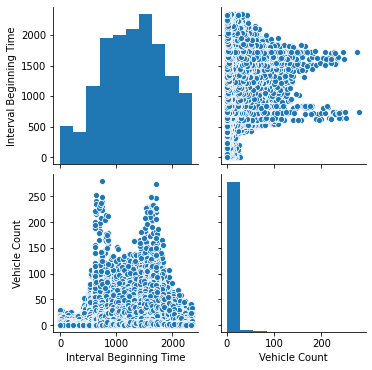

In [0]:
# Exit/enterance 24 and 25 seem to have large traffic
#Still cann't find the fault, what can it be, lets plot again
sns.pairplot(df_thruway)

In [0]:
# There seems to be something off in vehicle plot, hmm
df_thruway['Vehicle Count'].value_counts()

1      381794
2       96994
3       44258
4       25502
5       16417
        ...  
199         1
200         1
202         1
207         1
279         1
Name: Vehicle Count, Length: 221, dtype: int64

In [0]:
#Haha!, we find more than 381k rows with 1 vehicle which seems unlikely to happen
#This creates a problem for our ML model
#now let's convert 'Interval Beginning Time'  to hours - Idea borrowed from Sachit's Notebook 
def convert(interval):
  timestamp = str(interval)
  timestamp = timestamp.rjust(4, '0') # Adds zeros if not there
  return timestamp[:2]+':'+timestamp[2:]+':00' # Conversion to hh:mm:ss

#Applying the Function
times = df_thruway['Interval Beginning Time'].apply(convert)

#Gota convert date to str
df_thruway['Date'] = df_thruway['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

#Add a new column with date and time 
df_thruway['date_time'] = df_thruway['Date'] + ' ' + times
df_thruway['date_time'] = pd.to_datetime(df_thruway['date_time'])
df_thruway.head()

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),day_name,date_time
0,2020-06-09,15,17,0,5H,1,CASH,Tuesday,2020-06-09
1,2020-06-09,15,17,0,5S,1,E-ZPass,Tuesday,2020-06-09
2,2020-06-09,15,17,0,5H,6,E-ZPass,Tuesday,2020-06-09
3,2020-06-09,15,17,0,2L,16,E-ZPass,Tuesday,2020-06-09
4,2020-06-09,15,17,0,2H,1,E-ZPass,Tuesday,2020-06-09


In [0]:
df_thruway['date_time'] # Looks good

0        2020-06-09 00:00:00
1        2020-06-09 00:00:00
2        2020-06-09 00:00:00
3        2020-06-09 00:00:00
4        2020-06-09 00:00:00
                 ...        
634216   2020-06-03 22:00:00
634217   2020-06-03 22:15:00
634218   2020-06-03 22:30:00
634219   2020-06-03 22:45:00
634220   2020-06-03 23:30:00
Name: date_time, Length: 634221, dtype: datetime64[ns]

In [0]:
df_thruway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634221 entries, 0 to 634220
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            634221 non-null  object        
 1   Entrance                        634221 non-null  object        
 2   Exit                            634221 non-null  object        
 3   Interval Beginning Time         634221 non-null  int64         
 4   Vehicle Class                   634221 non-null  object        
 5   Vehicle Count                   634221 non-null  int64         
 6   Payment Type (Cash or E-ZPass)  634221 non-null  object        
 7   day_name                        634221 non-null  object        
 8   date_time                       634221 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 43.5+ MB


In [0]:
#Storing hour and day names
df_thruway['hour'] = df_thruway['date_time'].dt.hour
#df_thruway.drop("Interval Beginning Time", axis=1, inplace=True) - optional

In [0]:
df_thruway.head()

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),day_name,date_time,hour
0,2020-06-09,15,17,0,5H,1,CASH,Tuesday,2020-06-09,0
1,2020-06-09,15,17,0,5S,1,E-ZPass,Tuesday,2020-06-09,0
2,2020-06-09,15,17,0,5H,6,E-ZPass,Tuesday,2020-06-09,0
3,2020-06-09,15,17,0,2L,16,E-ZPass,Tuesday,2020-06-09,0
4,2020-06-09,15,17,0,2H,1,E-ZPass,Tuesday,2020-06-09,0


In [0]:
#Now look at stats according to hour
df_thruway.groupby('hour')['Vehicle Count'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,10786.0,1.647691,1.737295,1.0,1.0,1.0,2.0,29.0
1,8482.0,1.470644,1.349151,1.0,1.0,1.0,1.0,24.0
2,7635.0,1.411264,1.261812,1.0,1.0,1.0,1.0,26.0
3,8082.0,1.430958,1.313122,1.0,1.0,1.0,1.0,20.0
4,10782.0,1.669820,2.238422,1.0,1.0,1.0,1.0,52.0
5,17495.0,2.313861,4.527823,1.0,1.0,1.0,2.0,108.0
6,26751.0,3.307428,8.660137,1.0,1.0,1.0,2.0,252.0
7,30345.0,3.650552,10.155956,1.0,1.0,1.0,3.0,279.0
8,33458.0,3.307759,8.249418,1.0,1.0,1.0,2.0,214.0


In [0]:
# Did you see how means, and 75% are so low - this implies there is some faulty recording of data (Not recording correctly)

Satirical headline classification
---------------------------------

### Scenario

You are hired by a major social media platform to develop a machine
learning model that will be used to clearly mark *satirical news
articles* when they are shared on social media. You consider using this
dataset of 9,000 headlines from [The Onion](https://www.theonion.com/)
and 15,000 headlines from [Not The Onion on
Reddit](https://www.reddit.com/r/nottheonion/). [Link to OnionOrNot
data](https://github.com/lukefeilberg/onion)

### Read in data

This time, we’ll retrieve the data from Github.

In [0]:
!git clone https://github.com/lukefeilberg/onion.git
%cd onion

Cloning into 'onion'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
/content/onion


In [0]:
df_headline = pd.read_csv("OnionOrNot.csv")

In [0]:
%cd /content

/content


In [0]:
%ls

onion/  sample_data/


In [0]:
%pwd
%ls /content/onion/

Onion.ipynb  OnionOrNot.csv  README.md


In [0]:
#Now let's Start!
df_headline.head() # Interesting

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [0]:
df_headline.info() # No Null values - okay 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24000 non-null  object
 1   label   24000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.1+ KB


In [0]:
df_headline.groupby('label').describe() # As expected

text                                                               
       count unique                                                top freq
label                                                                      
0      15000  15000  Philosophy's Popularity Soars: Devotees Find I...    1
1       9000   9000  Texts You Send In Your 20s Vs. Texts You Send ...    1

In [0]:
# I see nothing that can directly lead us to finding faults, hmm
df_headline['List Text'] = df_headline['text'].str.split()
df_headline.head()

,text,label,List Text
0,Entire Facebook Staff Laughs As Man Tightens P...,1,"[Entire, Facebook, Staff, Laughs, As, Man, Tig..."
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,"[Muslim, Woman, Denied, Soda, Can, for, Fear, ..."
2,Bold Move: Hulu Has Announced That They’re Gon...,1,"[Bold, Move:, Hulu, Has, Announced, That, They..."
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,"[Despondent, Jeff, Bezos, Realizes, He’ll, Hav..."
4,"For men looking for great single women, online...",1,"[For, men, looking, for, great, single, women,..."


In [0]:
df_headline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       24000 non-null  object
 1   label      24000 non-null  int64 
 2   List Text  24000 non-null  object
dtypes: int64(1), object(2)
memory usage: 562.6+ KB


In [0]:
#Lets create a dict for mapping, I know there will be a more efficient way to create mapping, but right now this poped on top of my head, so going forward with this
d = {}
count = 0
#ans = []
for r in range(len(df_headline)):
  #ar = [0]*len(df_headline['List Text'].iloc[r])
  for j in range(len(df_headline['List Text'].iloc[r])):
    e = df_headline['List Text'].iloc[r][j]
    e = e.lower()
    if e in d:
      #ar[j] = d[e]
      continue
    else:
      d[e] = count
      #ar[j] = count
      count += 1
  #ans.append(ar)
print(d)



{'entire': 0, 'facebook': 1, 'staff': 2, 'laughs': 3, 'as': 4, 'man': 5, 'tightens': 6, 'privacy': 7, 'settings': 8, 'muslim': 9, 'woman': 10, 'denied': 11, 'soda': 12, 'can': 13, 'for': 14, 'fear': 15, 'she': 16, 'could': 17, 'use': 18, 'it': 19, 'a': 20, 'weapon': 21, 'bold': 22, 'move:': 23, 'hulu': 24, 'has': 25, 'announced': 26, 'that': 27, 'they’re': 28, 'gonna': 29, 'go': 30, 'ahead': 31, 'and': 32, 'reboot': 33, '‘shrill’': 34, 'while': 35, 'it’s': 36, 'still': 37, 'on': 38, 'since': 39, 'you': 40, 'idiots': 41, 'will': 42, 'watch': 43, 'anything': 44, 'despondent': 45, 'jeff': 46, 'bezos': 47, 'realizes': 48, 'he’ll': 49, 'have': 50, 'to': 51, 'work': 52, '9': 53, 'seconds': 54, 'earn': 55, 'back': 56, 'money': 57, 'he': 58, 'lost': 59, 'in': 60, 'divorce': 61, 'men': 62, 'looking': 63, 'great': 64, 'single': 65, 'women,': 66, 'online': 67, 'dating': 68, 'offers': 69, 'viable': 70, 'solution': 71, 'the': 72, 'otherwise': 73, 'frustrating': 74, 'task': 75, 'of': 76, 'finding': 

In [0]:
# Write a function to assign the mappings
def assign(val):
  ans = [0]*len(val)
  for i in range(len(val)):
    val[i] = val[i].lower()
    ans[i] = d[val[i]]
  return ans

df_headline['converted text'] = df_headline['List Text'].apply(assign)

In [0]:
df_headline.head()

,text,label,List Text,converted text
0,Entire Facebook Staff Laughs As Man Tightens P...,1,"[entire, facebook, staff, laughs, as, man, tig...","[0, 1, 2, 3, 4, 5, 6, 7, 8]"
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,"[muslim, woman, denied, soda, can, for, fear, ...","[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 4,..."
2,Bold Move: Hulu Has Announced That They’re Gon...,1,"[bold, move:, hulu, has, announced, that, they...","[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3..."
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,"[despondent, jeff, bezos, realizes, he’ll, hav...","[45, 46, 47, 48, 49, 50, 51, 52, 14, 53, 54, 5..."
4,"For men looking for great single women, online...",1,"[for, men, looking, for, great, single, women,...","[14, 62, 63, 14, 64, 65, 66, 67, 68, 69, 20, 7..."


In [0]:
df_headline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            24000 non-null  object
 1   label           24000 non-null  int64 
 2   List Text       24000 non-null  object
 3   converted text  24000 non-null  object
dtypes: int64(1), object(3)
memory usage: 750.1+ KB


In [0]:
#Now, we create a fn to count the occurances of a word
# It's lame comparing like this, if we do like this, no need to convert to int lists, by need suggestion to improve this
def count(ct): # ct - converted text
  c = 0
  x = d['by']
  for e in ct:
    if e == x:
      c += 1
  return c

In [0]:
#At last, check the word occorances
#By
df_headline['converted text'].apply(count).sum()

1365

In [0]:
#Need, a suggestion how to pass multiple arguments while using .apply()
#Meanwhile,  for 'THE'
def count(ct): # ct - converted text
  c = 0
  x = d['the']
  for e in ct:
    if e == x:
      c += 1
  return c
df_headline['converted text'].apply(count).sum()

4752

In [0]:
#of
def count(ct): # ct - converted text
  c = 0
  x = d['of']
  for e in ct:
    if e == x:
      c += 1
  return c
df_headline['converted text'].apply(count).sum()

5889

In [0]:
# Wow they all are zero
#Lets check normal words
#Facebook
def count(ct): # ct - converted text
  c = 0
  x = d['facebook']
  for e in ct:
    if e == x:
      c += 1
  return c
df_headline['converted text'].apply(count).sum()

227

In [0]:
#Now checking according to label
# 1 - Onion, 0 - Not Onion
#Facebook
def count(ct): # ct - converted text
  c = 0
  x = d['facebook']
  for e in ct:
    if e == x:
      c += 1
  return c
print(df_headline[df_headline['label']==1]['converted text'].apply(count).sum())
print(df_headline[df_headline['label']==0]['converted text'].apply(count).sum())

85
142


In [0]:
#Now checking according to label
# 1 - Onion, 0 - Not Onion
#the
def count(ct): # ct - converted text
  c = 0
  x = d['the']
  for e in ct:
    if e == x:
      c += 1
  return c
print(df_headline[df_headline['label']==1]['converted text'].apply(count).sum())
print(df_headline[df_headline['label']==0]['converted text'].apply(count).sum())

2561
2191


In [0]:
#Now checking according to label
# 1 - Onion, 0 - Not Onion
#of
def count(ct): # ct - converted text
  c = 0
  x = d['of']
  for e in ct:
    if e == x:
      c += 1
  return c
print(df_headline[df_headline['label']==1]['converted text'].apply(count).sum())
print(df_headline[df_headline['label']==0]['converted text'].apply(count).sum())

3006
2883


In [0]:
#Now checking according to label
# 1 - Onion, 0 - Not Onion
#entire
def count(ct): # ct - converted text
  c = 0
  x = d['entire']
  for e in ct:
    if e == x:
      c += 1
  return c
print(df_headline[df_headline['label']==1]['converted text'].apply(count).sum())
print(df_headline[df_headline['label']==0]['converted text'].apply(count).sum())

73
53


In [0]:
#Now checking according to label
# 1 - Onion, 0 - Not Onion
#realizes
def count(ct): # ct - converted text
  c = 0
  x = d['realizes']
  for e in ct:
    if e == x:
      c += 1
  return c
print(df_headline[df_headline['label']==1]['converted text'].apply(count).sum())
print(df_headline[df_headline['label']==0]['converted text'].apply(count).sum())

25
8


In [0]:
# Conclusion , I can come out is that whole text is like a spam with very less usefull words and more stop words. This makes the ML model ineffecient in training.
#I am sure that this is not whats, wrong with the dataset, I am open for suggestions

Offensive post classification
-----------------------------

### Scenario

The social media platform was so impressed with your work on detection
of satirical headlines, that they asked you to work on a model to
identify posts using offensive language. As training data, they hand you
80,000 tweets, labeled as either “hateful”, “abusive”, “spam”, or
“none”, by majority vote of five people. [Link to abusive tweets
data](https://dataverse.mpi-sws.org/dataset.xhtml?persistentId=doi:10.5072/FK2/ZDTEMN)

### Read in data

This time, we’ll read in data to Colab by downloading it to our own
computer from the link above, then uploading it to Colab.

Use the interactive file upload form below to upload the
`hatespeechtwitter.csv` file.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hatespeechtwitter.csv to hatespeechtwitter.csv
User uploaded file "hatespeechtwitter.csv" with length 2066944 bytes


In [0]:
df_tweets = pd.read_csv('hatespeechtwitter.csv')
df_tweets

,tweet_id,maj_label
0,849667487180259329,abusive
1,850490912954351616,abusive
2,848791766853668864,abusive
3,848306464892604416,abusive
4,850010509969465344,normal
...,...,...
79995,847640895956459521,normal
79996,850335795022102530,normal
79997,848201162717265920,normal
79998,848939985160077312,spam


Chest X-ray classification
--------------------------

### Scenario

You are working for a large hospital system to develop a machine
learning model that, given a chest X-ray, should identify those that
likely have COVID-19 so that they can take proper precautions against
the spread of infection within the hospital. You consider using two
datasets together: one with several hundred images of chest X-rays of
likely COVID-19 patients, and a pre-COVID dataset of chest X-ray images.
[Link to COVID-19 chest X-ray
data](https://github.com/ieee8023/covid-chestxray-dataset), [Link to
pre-COVID chest X-ray
data](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview)

### Read in data

First, we will download the RSNA data from the [RSNA
website](https://www.rsna.org/en/education/ai-resources-and-training/ai-image-challenge/RSNA-Pneumonia-Detection-Challenge-2018).

Then, we’ll also retrieve the COVID-19 data from Github.

#### RSNA data

In [0]:
!wget https://s3.amazonaws.com/east1.public.rsna.org/AI/2018/pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip -O pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip

--2020-06-11 15:43:10--  https://s3.amazonaws.com/east1.public.rsna.org/AI/2018/pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.143.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.143.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3978753654 (3.7G) [application/x-zip-compressed]
Saving to: ‘pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip’

pneumonia-challenge 100%[===================>]   3.71G  57.2MB/s    in 71s     

2020-06-11 15:44:21 (53.6 MB/s) - ‘pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip’ saved [3978753654/3978753654]



In [0]:
!mkdir rsna
!unzip -j -d rsna/ pneumonia-challenge-dataset-adjudicated-kaggle_2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.22951.1517874444.722969.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.10590.1517874352.985626.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.22972.1517874444.843039.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.2323.1517874295.912485.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.6958.1517874328.830012.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.12524.1517874365.540276.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.24080.1517874452.303978.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.17471.1517874404.253775.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.31348.1517874508.332097.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.3434.1517874301.999116.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.28766.1517874487.727558.dcm  
  inflating: rsna/1.2.276.0.7230010.3.1.4.8323329.13238.1517874370.39587

Now, we’ll make a list of all the image files:

In [0]:
import glob
rsna_images = glob.glob("rsna/*.dcm")
len(rsna_images)

30000

In [0]:
rsna_images[:5]

['rsna/1.2.276.0.7230010.3.1.4.8323329.2340.1517874296.6779.dcm',
 'rsna/1.2.276.0.7230010.3.1.4.8323329.9533.1517874343.620714.dcm',
 'rsna/1.2.276.0.7230010.3.1.4.8323329.5463.1517874316.499444.dcm',
 'rsna/1.2.276.0.7230010.3.1.4.8323329.24177.1517874452.978245.dcm',
 'rsna/1.2.276.0.7230010.3.1.4.8323329.11726.1517874360.156031.dcm']

These images are in DICOM format, a medical imaging file format. We need
to install an extra library to read them in:

In [0]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.3MB/s 


In [0]:
import pydicom as dicom
import numpy as np


Now, we can read in one file from the list:

In [0]:
ref_xray = dicom.read_file(rsna_images[0])
ref_xray

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.2340.1517874296.6779
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.2340.1517874296.6779
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time            

In [0]:
dir(ref_xray)

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setat

We’ll find out the dimensions of the image, then represent it as an
array of pixels, and plot it:

In [0]:
pixel_dims = (int(ref_xray.Rows), int(ref_xray.Columns))
pixel_dims

(1024, 1024)

In [0]:
ref_xray.pixel_array.shape

(1024, 1024)

In [0]:
print(ref_xray.pixel_array)

[[ 96  77  61 ... 175 184 120]
 [ 93  74  58 ... 169 178 116]
 [ 90  73  57 ... 159 170 111]
 ...
 [  0   0   0 ... 199 218 148]
 [  0   0   0 ... 199 218 148]
 [  0   0   0 ... 200 220 150]]


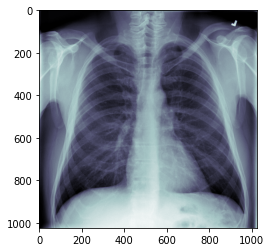

In [0]:
plt.imshow(ref_xray.pixel_array, cmap='bone')

#### COVID-19 data

In [0]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 3092 (delta 100), reused 197 (delta 64), pack-reused 2845
Receiving objects: 100% (3092/3092), 573.01 MiB | 41.17 MiB/s, done.
Resolving deltas: 100% (1204/1204), done.
Checking out files: 100% (891/891), done.


In [0]:
covid_metadata = pd.read_csv('covid-chestxray-dataset/metadata.csv')
covid_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               673 non-null    object 
 1   offset                  524 non-null    float64
 2   sex                     606 non-null    object 
 3   age                     522 non-null    float64
 4   finding                 673 non-null    object 
 5   survival                264 non-null    object 
 6   intubated               237 non-null    object 
 7   intubation_present      235 non-null    object 
 8   went_icu                296 non-null    object 
 9   in_icu                  243 non-null    object 
 10  needed_supplemental_O2  81 non-null     object 
 11  extubated               36 non-null     object 
 12  temperature             73 non-null     float64
 13  pO2_saturation          117 non-null    float64
 14  leukocyte_count         15 non-null     fl

In [0]:
covid_metadata.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [0]:
covid_metadata.modality.value_counts()

X-ray    589
CT        84
Name: modality, dtype: int64

In [0]:
covid_metadata.finding.value_counts()

COVID-19                          526
No Finding                         23
Streptococcus                      17
Pneumocystis                       17
SARS                               16
Pneumonia                          14
COVID-19, ARDS                     12
Klebsiella                          8
Mycoplasma Bacterial Pneumonia      8
Legionella                          6
Varicella                           5
Lipoid                              5
Bacterial                           4
ARDS                                4
E.Coli                              4
Chlamydophila                       2
Influenza                           2
Name: finding, dtype: int64

We’re going to pull out a subset of the data that (1) is a chest X-ray,
not CT, and (2) has a positive COVID-19 finding,

In [0]:
covid_xray_metadata = covid_metadata[(covid_metadata["modality"] == "X-ray") & (covid_metadata["finding"] == "COVID-19")]
covid_xray_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 672
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               446 non-null    object 
 1   offset                  376 non-null    float64
 2   sex                     402 non-null    object 
 3   age                     316 non-null    float64
 4   finding                 446 non-null    object 
 5   survival                163 non-null    object 
 6   intubated               160 non-null    object 
 7   intubation_present      154 non-null    object 
 8   went_icu                227 non-null    object 
 9   in_icu                  185 non-null    object 
 10  needed_supplemental_O2  60 non-null     object 
 11  extubated               30 non-null     object 
 12  temperature             57 non-null     float64
 13  pO2_saturation          101 non-null    float64
 14  leukocyte_count         13 non-null     fl

Make a list of image files:

In [0]:
covid_images = 'covid-chestxray-dataset/images/' +  covid_xray_metadata['filename']
len(covid_images)

446

In [0]:
covid_images

0      covid-chestxray-dataset/images/auntminnie-a-20...
1      covid-chestxray-dataset/images/auntminnie-b-20...
2      covid-chestxray-dataset/images/auntminnie-c-20...
3      covid-chestxray-dataset/images/auntminnie-d-20...
4      covid-chestxray-dataset/images/nejmc2001573_f1...
                             ...                        
668    covid-chestxray-dataset/images/covid-19-caso-9...
669    covid-chestxray-dataset/images/covid-19-caso-9...
670    covid-chestxray-dataset/images/covid-19-caso-9...
671    covid-chestxray-dataset/images/covid-19-caso-9...
672    covid-chestxray-dataset/images/covid-19-caso-1...
Name: filename, Length: 446, dtype: object

We’ll use the PIL library to read in JPG and PNG files, and plot one:

In [0]:
from PIL import Image

In [0]:
image = Image.open(covid_images[0])
image_bw = image.convert('L') #  L is 8-bit pixels, black and white

In [0]:
image_data = np.asarray(image_bw)
image_data.shape

(888, 882)

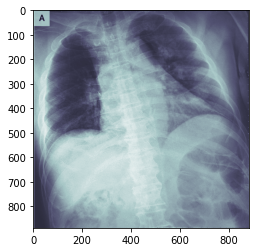

In [0]:
plt.imshow(image_bw, cmap='bone')

#### Plot samples of each

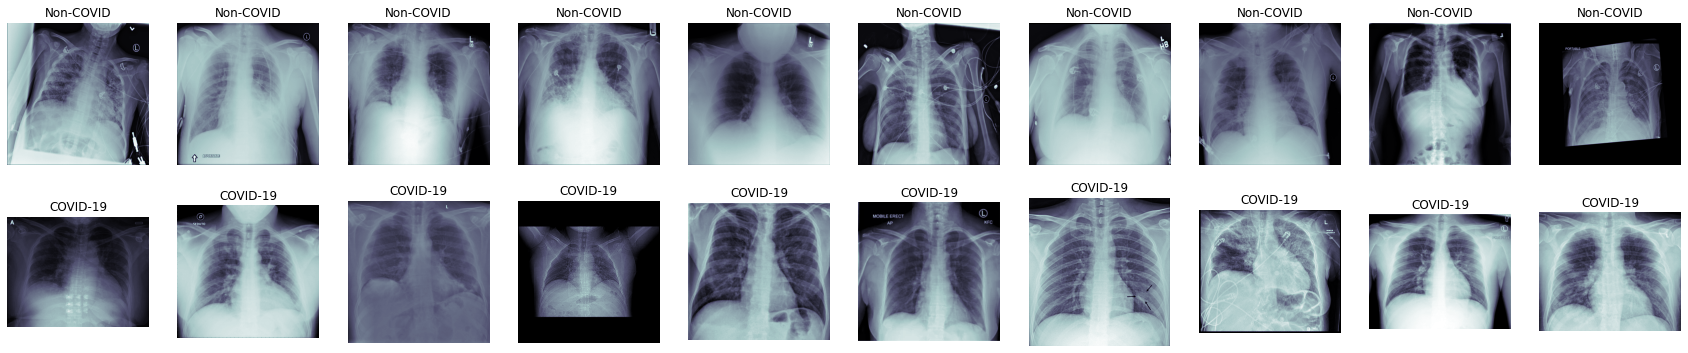

In [0]:
num_classes = 2
samples_per_class = 10
figure = plt.figure(figsize=(samples_per_class*3, num_classes*3))

# plot RSNA samples
rsna_samples = np.random.choice(rsna_images, samples_per_class, replace=False)
for i, sample in enumerate(rsna_samples):
    plt_idx = i + 1
    plt.subplot(num_classes, samples_per_class, plt_idx)
    sample_img = dicom.read_file(sample).pixel_array
    plt.imshow(sample_img, cmap='bone')
    plt.axis('off')
    plt.title("Non-COVID")


# plot COVID samples
covid_samples = np.random.choice(covid_images, samples_per_class, replace=False)
for i, sample in enumerate(covid_samples):
    plt_idx = samples_per_class + i + 1
    plt.subplot(num_classes, samples_per_class, plt_idx)
    sample_img = Image.open(sample)
    sample_image_bw = sample_img.convert('L')
    plt.imshow(sample_image_bw, cmap='bone')
    plt.axis('off')
    plt.title("COVID-19")

plt.show()